# Inspecting the distributions of pathogenic genera

In [1]:
import numpy as np
import pandas as pd
import os
import pickle
import seaborn as sns
os.chdir('../datasets')

In [48]:
with open('karius_genus_data_raw.pickle', 'rb') as f:
    X, y = pickle.load(f)

# X = X.apply(axis=0, func=lambda x: x / x.sum())

# Remove empty columns
X = X.loc[:, (X != 0).any(axis=0)]

septic = X[y == 1]
healthy = X[y == 0]
df = pd.concat([X, y], axis=1)
df.to_csv('karius_genus_raw.csv', header=True, index=False)
display(X)

genus,Bradyrhizobium,Rhodopseudomonas,Bosea,Afipia,Oligotropha,Variibacter,Methylobacterium,Methylorubrum,Microvirga,Agrobacterium,...,Candidatus Evansia,Thermanaerovibrio,Marinilactibacillus,Paludibacter,Nonagvirus,Candidatus Hepatoplasma,Halovivax,Phifelvirus,Planktothrix,Denitrobacterium
SRR8289234,10097.0,62.0,298.0,17.0,0.0,0.0,3155.0,183.0,0.0,1639.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR8288839,9808.0,73.0,126.0,19.0,11.0,0.0,3187.0,282.0,17.0,2230.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR8288955,14818.0,232.0,60.0,68.0,10.0,0.0,320.0,164.0,0.0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR8289295,4378.0,28.0,0.0,21.0,3.0,0.0,218.0,63.0,0.0,654.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR8289341,9629.0,91.0,79.0,19.0,0.0,0.0,233.0,188.0,0.0,101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR8288791,3472.0,27.0,24.0,2.0,0.0,0.0,536.0,350.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR8288590,20476.0,234.0,60.0,53.0,30.0,0.0,8183.0,480.0,6.0,1289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR8288945,7599.0,11.0,50.0,26.0,7.0,1.0,1450.0,320.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR8288681,20558.0,96.0,82.0,51.0,19.0,0.0,796.0,736.0,0.0,1439.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Choice of genera

In [21]:
genus_list = ['Escherichia', 'Sphingomonas', 'Ralstonia', 'Burkholderia', 'Stenotrophomonas', 'Alphatorquevirus', 'Streptococcus', 'Micrococcus']

In [22]:
import matplotlib.pyplot as plt
for genus in genus_list:
    septic = X_septic[genus]
    healthy = X_healthy[genus]
    plt.figure(genus)
    plt.title(genus)
    plt.hist(septic, bins=50, label='Septic', alpha = 0.5)
    plt.hist(healthy, bins=50, label='Healthy', alpha=0.5)
    plt.legend(loc='best')
    plt.show()


KeyError: 'Escherichia'

In [ ]:
def get_prop(df, threshold):
    df = df.copy()
    df[df < threshold] = 0
    df[df >= threshold] = 1
    prop = df.apply(lambda x:x.sum()/len(X), axis=0)
    prop = prop.sort_values(ascending=False)
    return prop


prop = get_prop(X_healthy, 1)
prop2 = get_prop(X_healthy, 10)
prop3 = get_prop(X_healthy, 100)
prop4 = get_prop(X_healthy, 1000)

prop2 = prop2[prop.index]
prop3 = prop3[prop.index]
prop4 = prop4[prop.index]

s_prop = get_prop(X_septic, 1)
s_prop2 = get_prop(X_septic, 10)
s_prop3 = get_prop(X_septic, 100)
s_prop4 = get_prop(X_septic, 1000)

s_prop2 = s_prop2[prop.index]
s_prop3 = s_prop3[prop.index]
s_prop4 = s_prop4[prop.index]

alpha = 0.8
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.bar(x=prop.index, height=prop, alpha=alpha, label='Threshold = 1')
plt.bar(x=prop2.index, height=prop2, alpha=alpha, label='Threshold = 10')
plt.bar(x=prop3.index, height=prop3, alpha=alpha, label='Threshold = 100')
plt.bar(x=prop4.index, height=prop4, alpha=alpha, label='Threshold = 1000')
plt.xticks([], [])
# plt.xlabel('Genera')
plt.ylim(0, 0.6)
plt.title('Healthy patients')

plt.subplot(122)
plt.bar(x=s_prop.index, height=s_prop, alpha=alpha, label='Threshold = 1')
plt.bar(x=s_prop2.index, height=s_prop2, alpha=alpha, label='Threshold = 10')
plt.bar(x=s_prop3.index, height=s_prop3, alpha=alpha, label='Threshold = 100')
plt.bar(x=s_prop4.index, height=s_prop4, alpha=alpha, label='Threshold = 1000')
plt.xticks([], [])
plt.xlabel('Genera')
plt.yticks([], [])
plt.ylim(0, 0.6)
plt.title('Septic patients')
plt.legend()

plt.suptitle('Proportion of Samples Exceeding Threshold for Each Genus', y=1.05, fontweight='bold')

plt.tight_layout()
plt.show()


(array([526., 119.,  75.,  38.,  36.,  38.,  22.,  18.,  16.,  14.,  11.,
          9.,  10.,  13.,  10.,   9.,  10.,   8.,   7.,   0.,   3.,   6.,
          7.,   5.,   2.,   2.,   2.,   5.,   3.,   3.,   2.,   0.,   3.,
          3.,   4.,   7.,   0.,   1.,   2.,   3.,   5.,   0.,   2.,   3.,
          3.,   2.,   4.,   1.,   5.,  13.]),
 array([  0. ,   3.4,   6.8,  10.2,  13.6,  17. ,  20.4,  23.8,  27.2,
         30.6,  34. ,  37.4,  40.8,  44.2,  47.6,  51. ,  54.4,  57.8,
         61.2,  64.6,  68. ,  71.4,  74.8,  78.2,  81.6,  85. ,  88.4,
         91.8,  95.2,  98.6, 102. , 105.4, 108.8, 112.2, 115.6, 119. ,
        122.4, 125.8, 129.2, 132.6, 136. , 139.4, 142.8, 146.2, 149.6,
        153. , 156.4, 159.8, 163.2, 166.6, 170. ]),
 <a list of 50 Patch objects>)

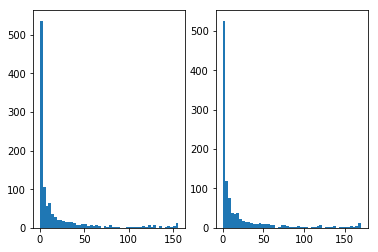

In [32]:
non_zero_septic = (septic > 0).apply(sum, 0)
non_zero_healthy = (healthy > 0).apply(sum, 0)
plt.subplot(121)
plt.hist(non_zero_septic, bins=50)
plt.subplot(122)
plt.hist(non_zero_healthy, bins=50)

Text(0.5, 1.0, 'Histogram of Read Counts for Each Sample')

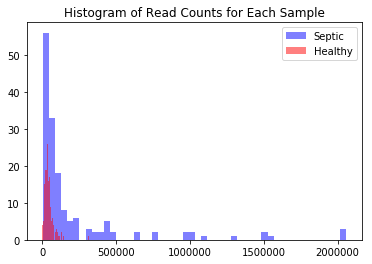

In [45]:
sum_healthy = healthy.apply(sum, 1)
sum_septic = septic.apply(sum, 1)
plt.hist(sum_septic, bins=50, color='blue', alpha=0.5, label='Septic')
plt.hist(sum_healthy, bins=50, color='red', alpha=0.5, label='Healthy')
plt.legend()
plt.title('Histogram of Read Counts for Each Sample')
